In [3]:
!pip install scikit-learn pandas nltk

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [2]:
data = {
    'text': [
        "I love this!", "This is awful", "Not bad", "Terrible experience",
        "Amazing work", "Could be better", "Worst movie ever", "I enjoyed it",
        "I hate this", "I dislike it", "Absolutely hate it", "I really love it",
        "Not great", "Pretty bad", "Wonderful experience", "This is not good"
    ],
    'sentiment': [
        "positive", "negative", "neutral", "negative",
        "positive", "neutral", "negative", "positive",
        "negative", "negative", "negative", "positive",
        "neutral", "negative", "positive", "negative"
    ]
}
df = pd.DataFrame(data)
df


,text,sentiment
0,I love this!,positive
1,This is awful,negative
2,Not bad,neutral
3,Terrible experience,negative
4,Amazing work,positive
5,Could be better,neutral
6,Worst movie ever,negative
7,I enjoyed it,positive
8,I hate this,negative
9,I dislike it,negative


In [4]:
X = df['text']
y = df['sentiment']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2)

model = MultinomialNB()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.25


In [5]:
def predict_sentiment(text):
    vector = vectorizer.transform([text])
    result = model.predict(vector)
    return result[0]

# Try with your own sentence
predict_sentiment("I hate this product")


np.str_('negative')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

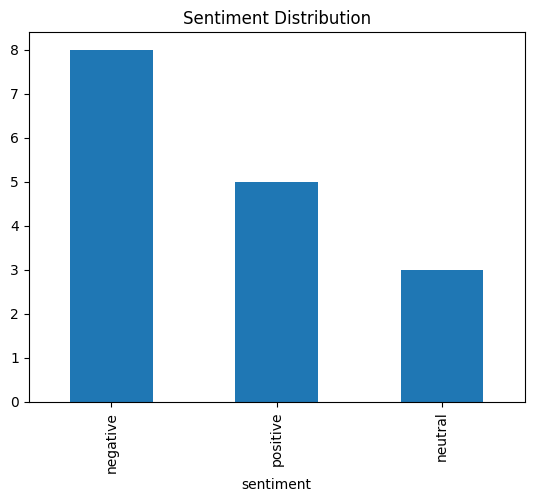

In [6]:
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')


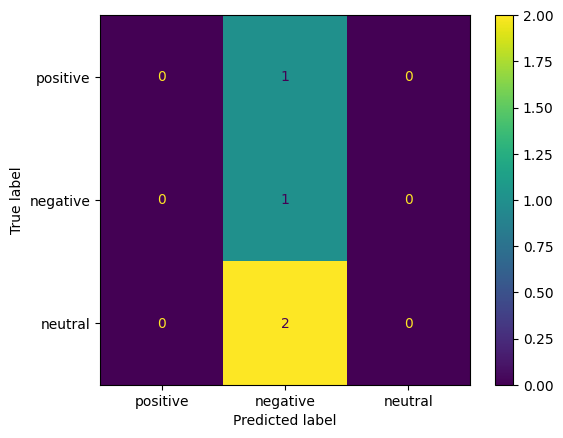

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred, labels=["positive", "negative", "neutral"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative", "neutral"])
disp.plot()
plt.show()
